Task-9

Name: Varsha Gupta

Referral Id: DIRSS3129


In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Taken from "housing.names" file
header=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICES']
df = pd.read_csv("housing.csv", names=header, delim_whitespace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICES   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICES'],
      dtype='object')

In [7]:
df.shape

(506, 14)

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICES     229
dtype: int64

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICES     0
dtype: int64

In [11]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

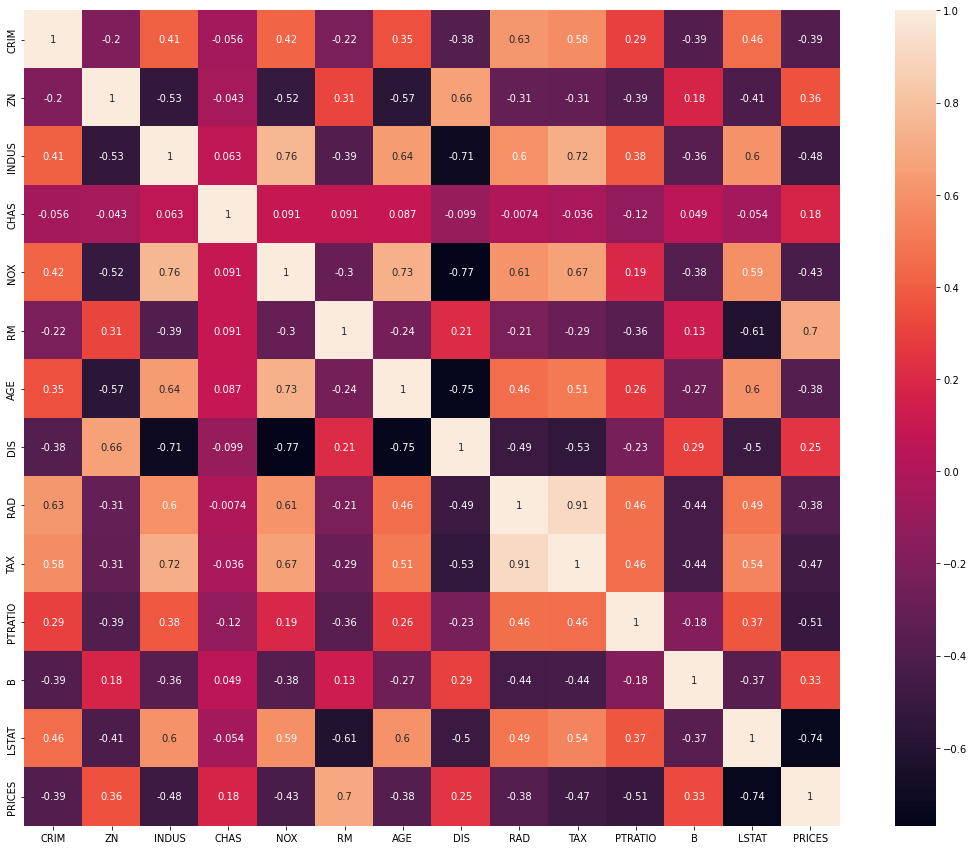

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, cbar=True, square= True, annot=True,)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


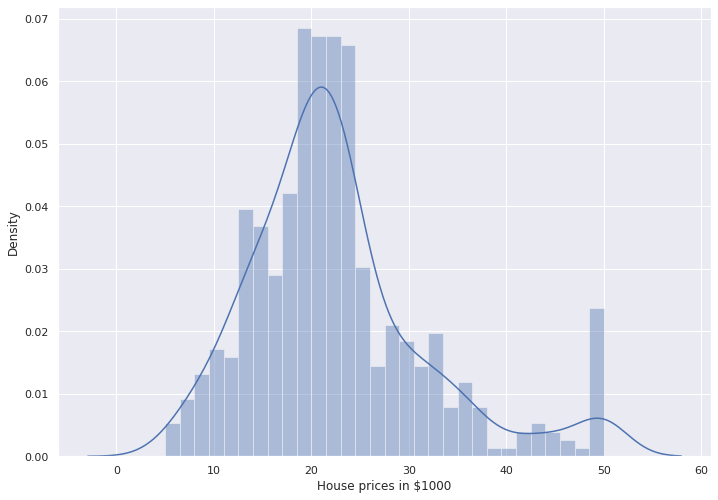

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['PRICES'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

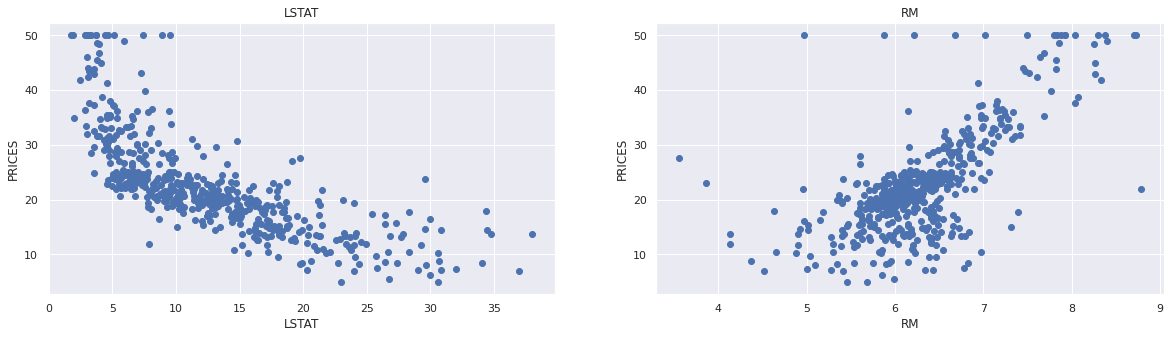

In [14]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['PRICES']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICES')

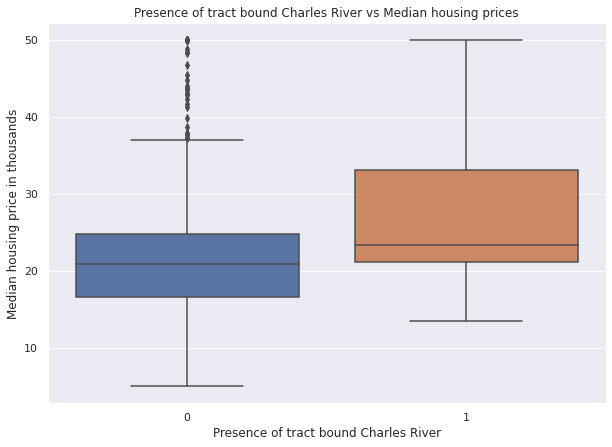

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['CHAS'], y=df['PRICES'])
plt.xlabel("Presence of tract bound Charles River") 
plt.ylabel("Median housing price in thousands") 
plt.title("Presence of tract bound Charles River vs Median housing prices")
plt.show()

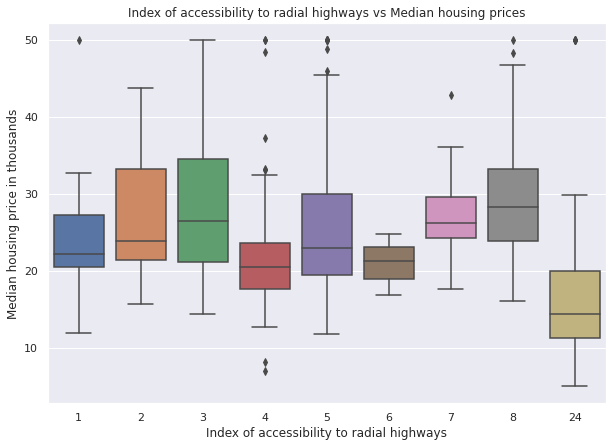

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['RAD'], y=df['PRICES'])
plt.xlabel("Index of accessibility to radial highways") 
plt.ylabel("Median housing price in thousands") 
plt.title("Index of accessibility to radial highways vs Median housing prices")
plt.show()

In [17]:
import plotly.express as px
import scipy.stats as stats

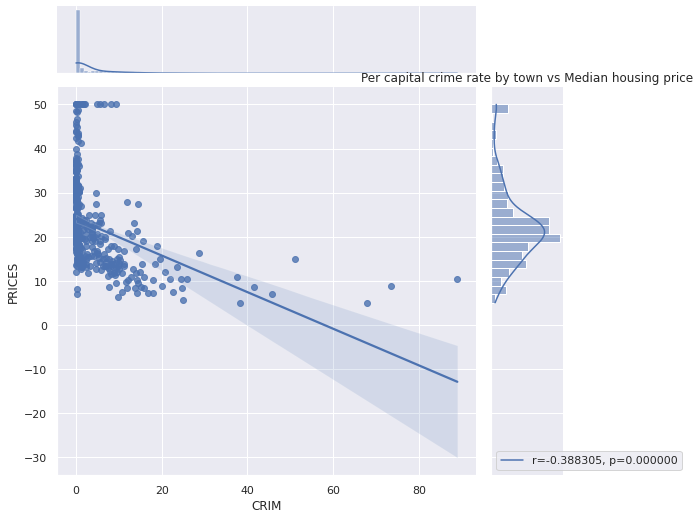

In [18]:
sns.jointplot(x=df['CRIM'], y=df['PRICES'], kind="reg", height=8)
r, p = stats.pearsonr(df['CRIM'], df['PRICES'])
plt.legend(['r={:f}, p={:f}'.format(r,p)])
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Median housing price in thousands")
plt.title("Per capital crime rate by town vs Median housing price")
plt.subplots_adjust(top=0.90) 
plt.show()

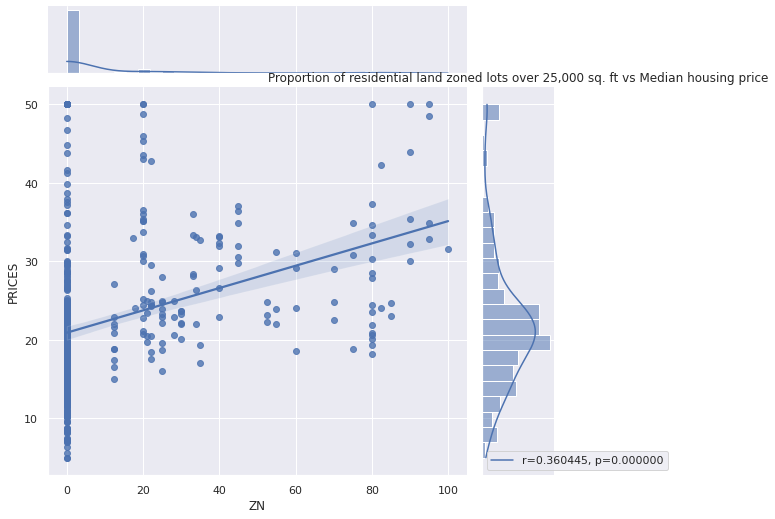

In [19]:
sns.jointplot(x=df['ZN'], y=df['PRICES'], kind='reg', height=8)
r, p = stats.pearsonr(df['ZN'], df['PRICES'])
plt.legend(['r={:f}, p={:f}'.format(r,p)])
plt.xlabel("Proportion of residential land zoned lots (over 25,000 sq. ft.)")
plt.ylabel("Median housing price in thousands")
plt.title("Proportion of residential land zoned lots over 25,000 sq. ft vs Median housing price")
plt.subplots_adjust(top=0.90)
plt.show() 


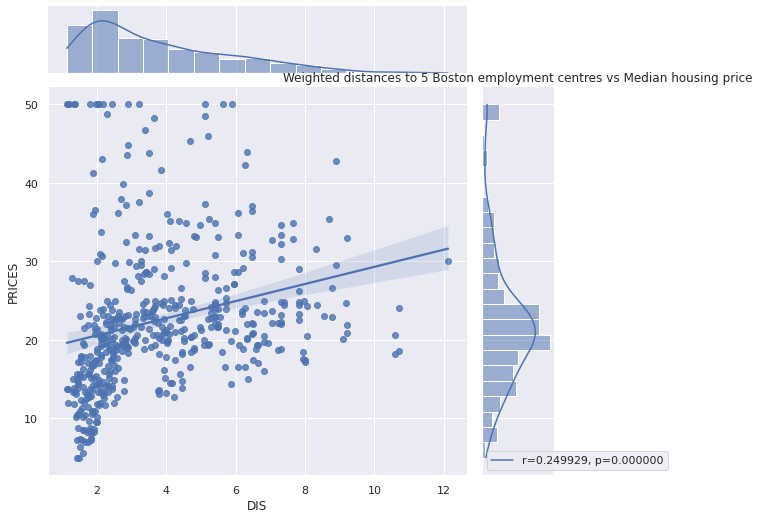

In [20]:
sns.jointplot(x=df['DIS'], y=df['PRICES'], kind='reg', height=8)
r, p = stats.pearsonr(df['DIS'], df['PRICES'])
plt.legend(['r={:f}, p={:f}'.format(r,p)])
plt.xlabel("Weighted distances to 5 Boston employment centres")
plt.ylabel("Median housing price in thousands")
plt.title("Weighted distances to 5 Boston employment centres vs Median housing price")
plt.subplots_adjust(top=0.90)
plt.show() 

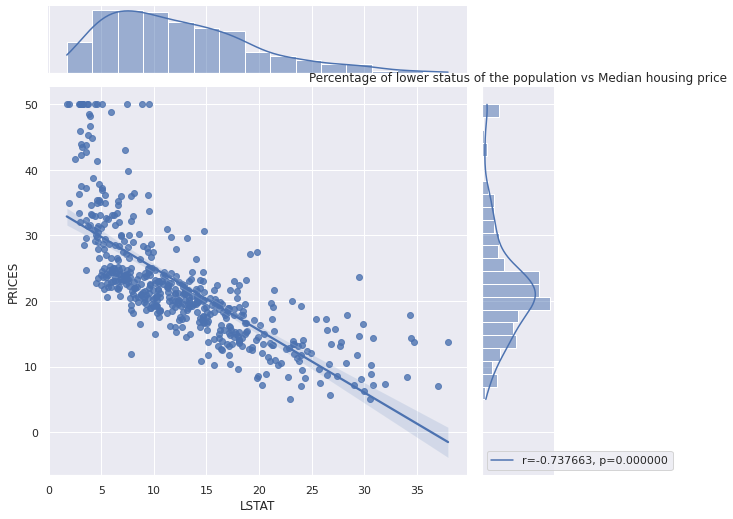

In [21]:
sns.jointplot(x=df['LSTAT'], y=df['PRICES'], kind='reg', height=8)
r, p = stats.pearsonr(df['LSTAT'], df['PRICES'])
plt.legend(['r={:f}, p={:f}'.format(r,p)])
plt.xlabel("Percentage of lower status of the population")
plt.ylabel("Median housing price in thousands")
plt.title("Percentage of lower status of the population vs Median housing price")
plt.subplots_adjust(top=0.90)
plt.show() 

In [22]:
# Spliting target variable and independent variables
X = df.drop(['PRICES'], axis = 1)
y = df['PRICES']

In [23]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [27]:
# Value of y intercept
lm.intercept_

37.9124870097502

In [28]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.1308
1,ZN,0.049403
2,INDUS,0.001095
3,CHAS,2.705366
4,NOX,-15.95705
5,RM,3.413973
6,AGE,0.001119
7,DIS,-1.493081
8,RAD,0.364422
9,TAX,-0.013172


In [29]:
y_pred = lm.predict(X_train)

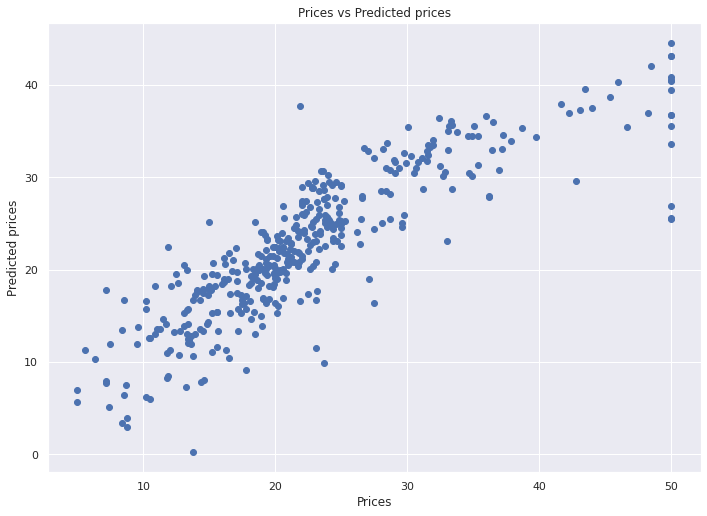

In [30]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

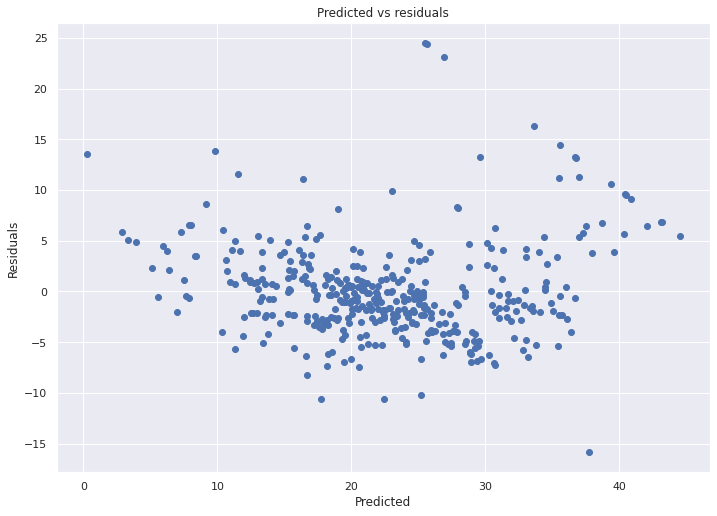

In [31]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Text(0.5, 1.0, 'Distribution of error between actual and predicted values')

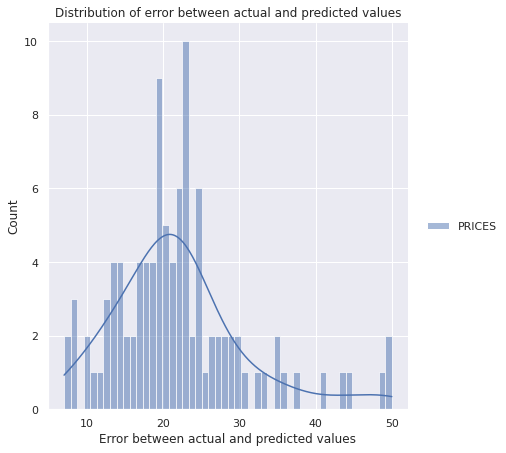

In [32]:
sns.displot((y_train,y_test),bins=50, kde=True, height=6)
plt.xlabel("Error between actual and predicted values") 
plt.ylabel("Count")
plt.title("Distribution of error between actual and predicted values")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


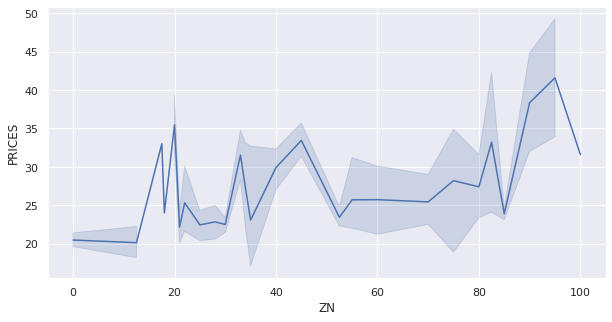

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(df['ZN'],df['PRICES'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


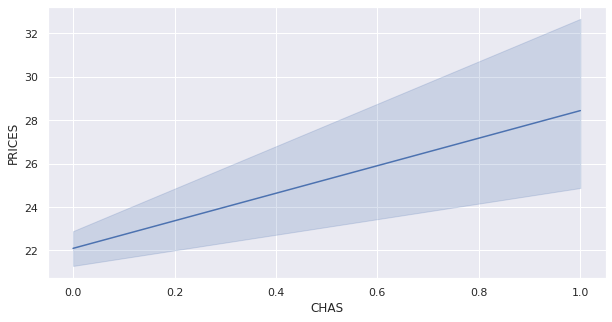

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(df['CHAS'],df['PRICES'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


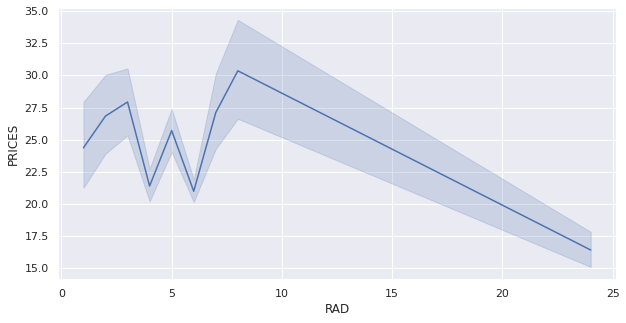

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(df['RAD'],df['PRICES'])

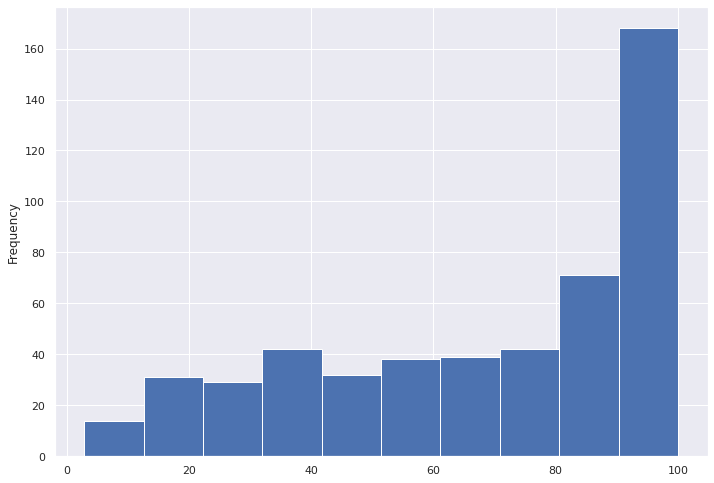

In [37]:
df['AGE'].plot.hist()

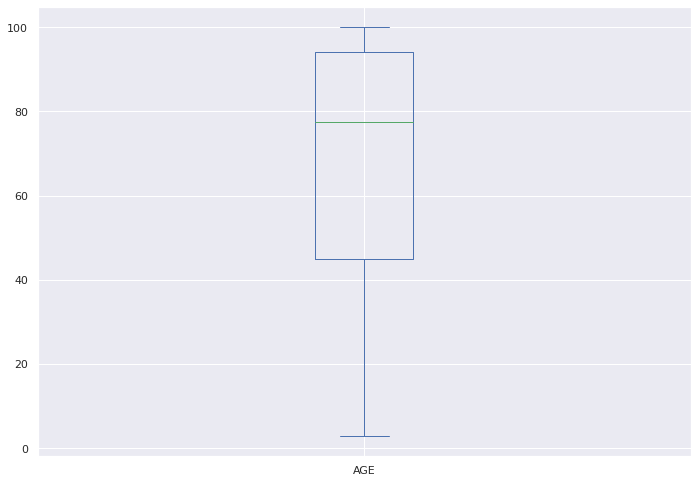

In [38]:
df['AGE'].plot.box()

In [40]:
# Importing ML model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
# Predicting the values and calculating RMSE
y_train_predict=lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))

# on training dataset
print("The model performance for training set")
print('RMSE is{}'.format(rmse))
print("\n")

# on test set
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
print("The model performance for testing set")
print('RMSE is{}'.format(rmse))

The model performance for training set
RMSE is4.741000992236517


The model performance for testing set
RMSE is4.5682920423032
